In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pathresults = "../../results/"
#pathresults = "/DUMUXDune27/DUMUX/dumux-rosi/python/paperSc/results/"
data_file_delimiter = ","
import matplotlib.ticker as mtick
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

In [33]:

# get param set
paramsets =  pd.read_csv('../../output_random_rows.csv')
paramsets = paramsets.drop(paramsets.columns.tolist()[-1],axis=1)
outputvalsname =  ['wat','cs','cl','coa','cod','cca','ccd','css2','co2','yX','yY','yZ']
column_names = outputvalsname + paramsets.columns.tolist()
paramsets.drop('theta',inplace=True, axis=1)
paramsets.drop('ro_B',inplace=True, axis=1)
paramsets.drop('k_sorp',inplace=True, axis=1)
selectedSets = [19, 47, 76, 83]

In [34]:
repr(paramsets.columns.tolist())

"['beta_C', 'beta_O', 'C_thres,C', 'C_thres,O', 'DS_W', 'k_C,S', 'k_d,C', 'k_d,O', 'K_L', 'k_O,S', 'k_r,C', 'k_r,O', 'm_max,C', 'm_max,O', 'p_L', 'u_max,C', 'u_max,O', 'v_max,L', 'Y', 'Y_C', 'Y_O', 'CSS_max', 'CL_init', 'CS_init']"

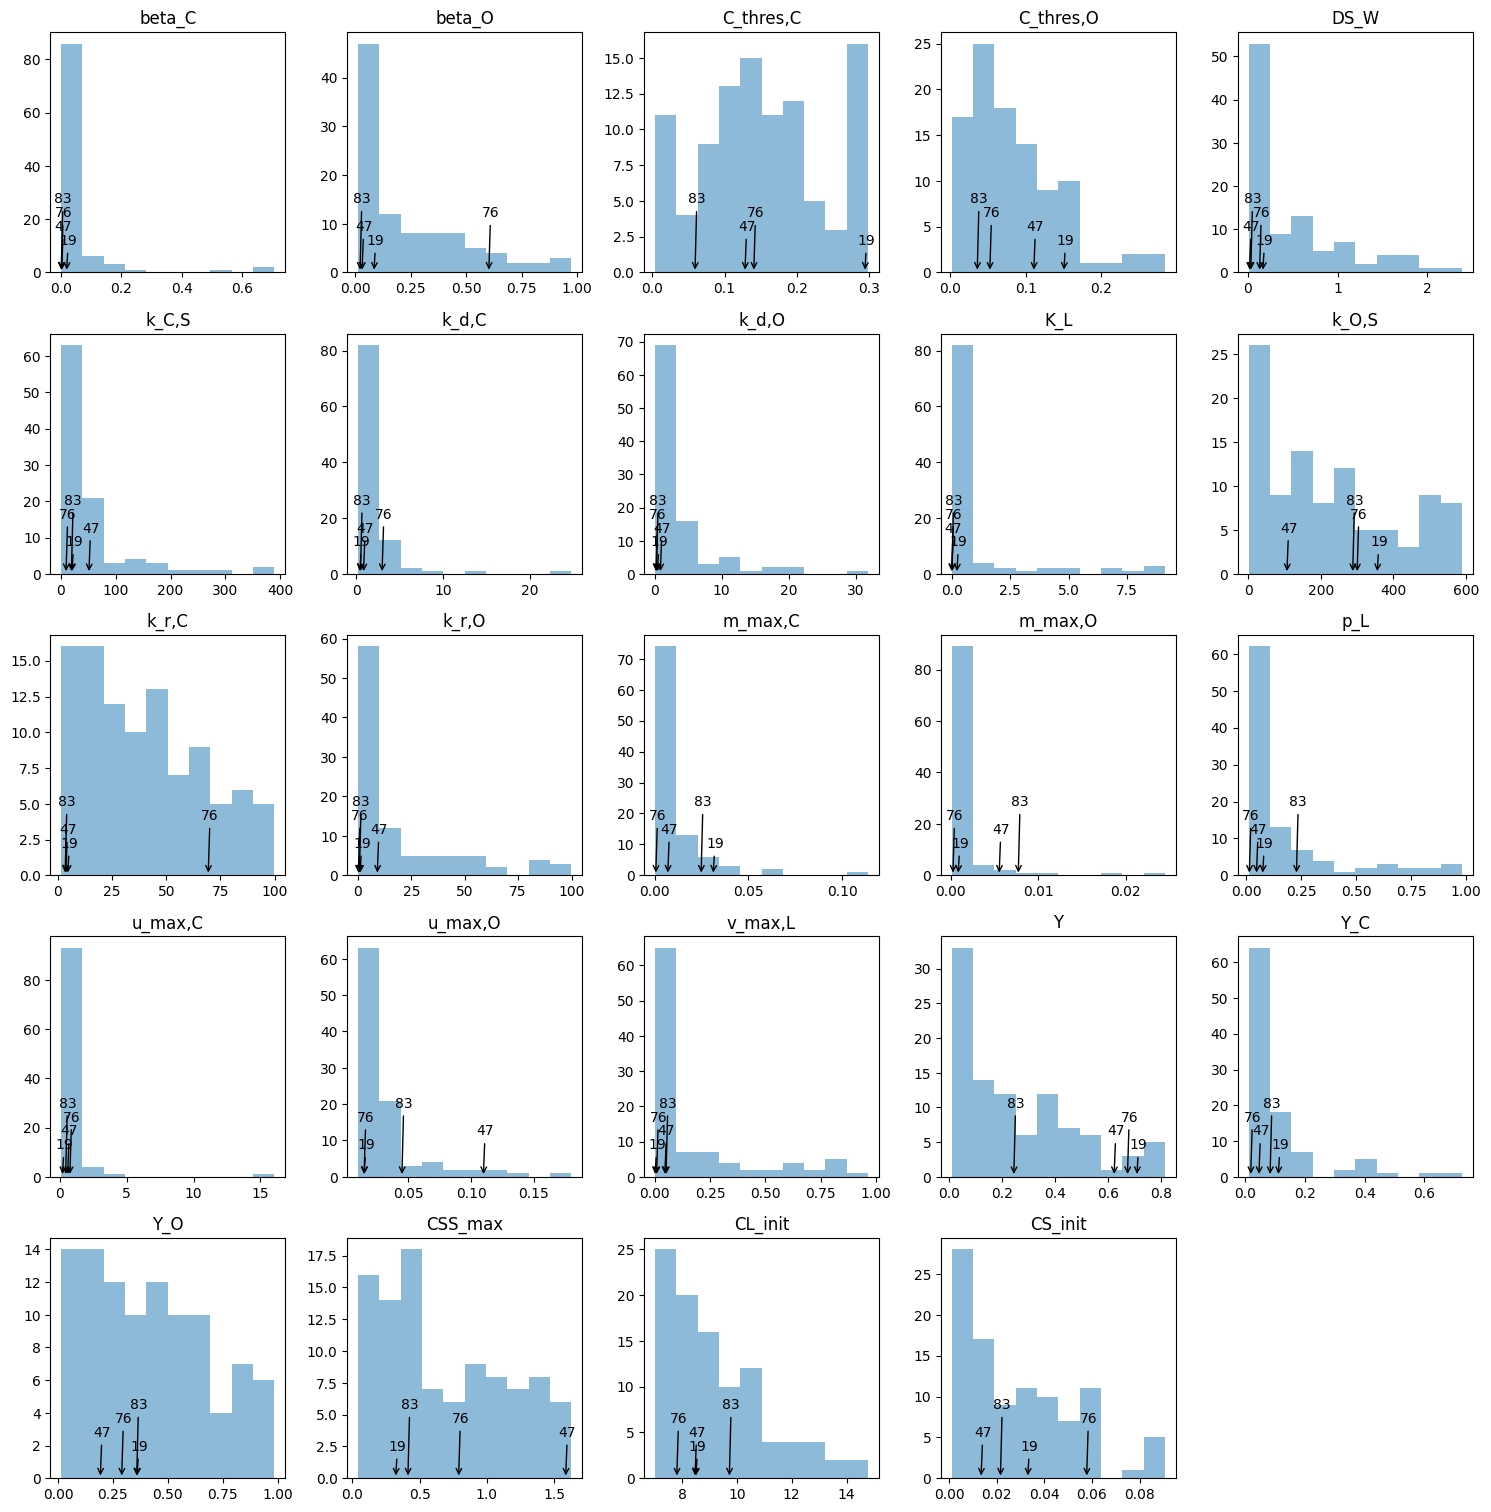

In [35]:
# Create subplots grid

# Calculate the number of rows and columns needed for subplots
num_rows = 6
num_cols = 5
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 18))

# Flatten the axes array to iterate over them easily
axes = axes.flatten()

#outliers = selectedSets
# Plot histograms for each column
for i, column in enumerate(paramsets.columns):
    ax = axes[i]  # Get the current axis
    ax.hist(paramsets[column], alpha=0.5)
    ax.set_title(column)
    
    xtexts = [-10, 20, 50, 80]
    ytexts = [20, 30, 40, 50]
    # Add label for maximum value
    for idout, outliers in enumerate(selectedSets):
        # Find row index with maximum value for the current column
        max_row_index = outliers
        max_value = paramsets[column][outliers]
        ax.annotate(max_row_index,
                     xy=(max_value, 0), xycoords='data',
                     xytext=(-5, ytexts[idout]), textcoords='offset points',
                     arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))

# Remove any empty subplots if the number of columns exceeds the number of data columns
for i in range(len(paramsets.columns), num_rows*num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

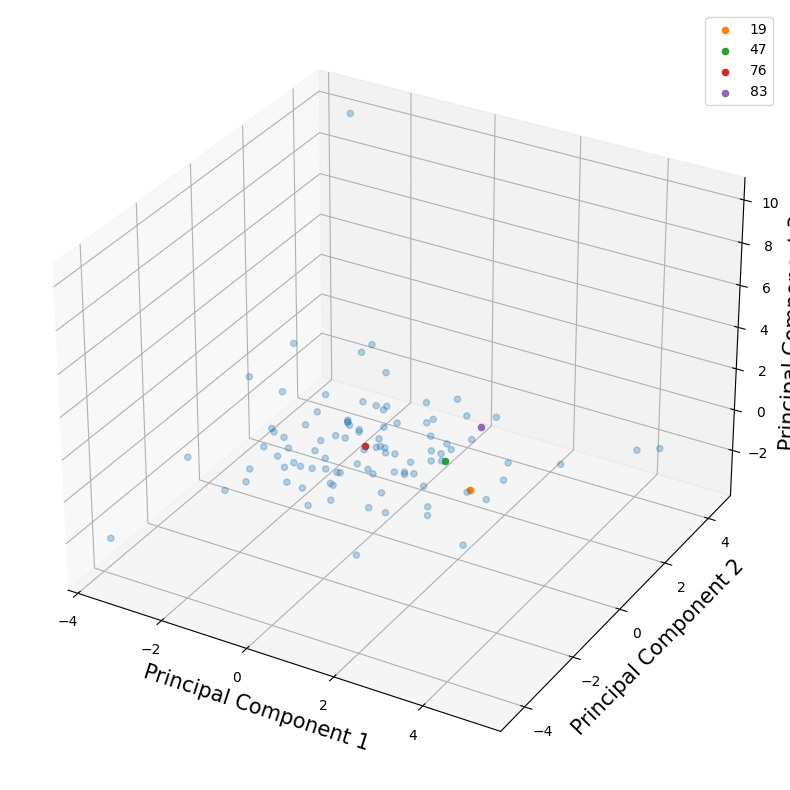

In [39]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns
# Separating out the features
x = paramsets

# Separating out the target
y = np.array([i for i in range(paramsets.shape[0])])
target = pd.DataFrame(data = y
             , columns = ['pSet_id'])

# Standardizing the features
x = StandardScaler().fit_transform(x)

from sklearn.decomposition import PCA
numComp = 3

pca = PCA(n_components=numComp)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component '+str(i+1) for i in range(numComp)])


finalDf = pd.concat([principalDf, target[['pSet_id']]], axis = 1)


# List of colors in the color palettes
rgb_values = sns.color_palette("Set2", 99)
color_labels = finalDf['pSet_id'].unique()


fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection='3d') 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
#ax.set_title('2 component PCA', fontsize = 20)

# Remove rows using boolean indexing
finalDf_ = finalDf[~finalDf.index.isin(selectedSets)]
ax.scatter(finalDf_[ 'principal component 1']
           , finalDf_['principal component 2']
           , finalDf_['principal component 3'],alpha = 0.3
           #, c = finalDf['pSet_id']#.map(color_map)
           )

#finalDf_ = finalDf

for vall in selectedSets:
    subset = finalDf[finalDf['pSet_id'] == vall]  # Select subset where 'pSet' equals the current value

    ax.scatter(subset[ 'principal component 1']
           , subset['principal component 2']
           , subset['principal component 3'], alpha=1, 
               zorder=100,label=f'{vall}'
           #, c = finalDf['pSet_id']#.map(color_map)
           )
    plt.legend()

ax.grid()

In [40]:
print(pca.explained_variance_ratio_,sum(pca.explained_variance_ratio_))

[0.12177883 0.11611341 0.08886973] 0.3267619758723358


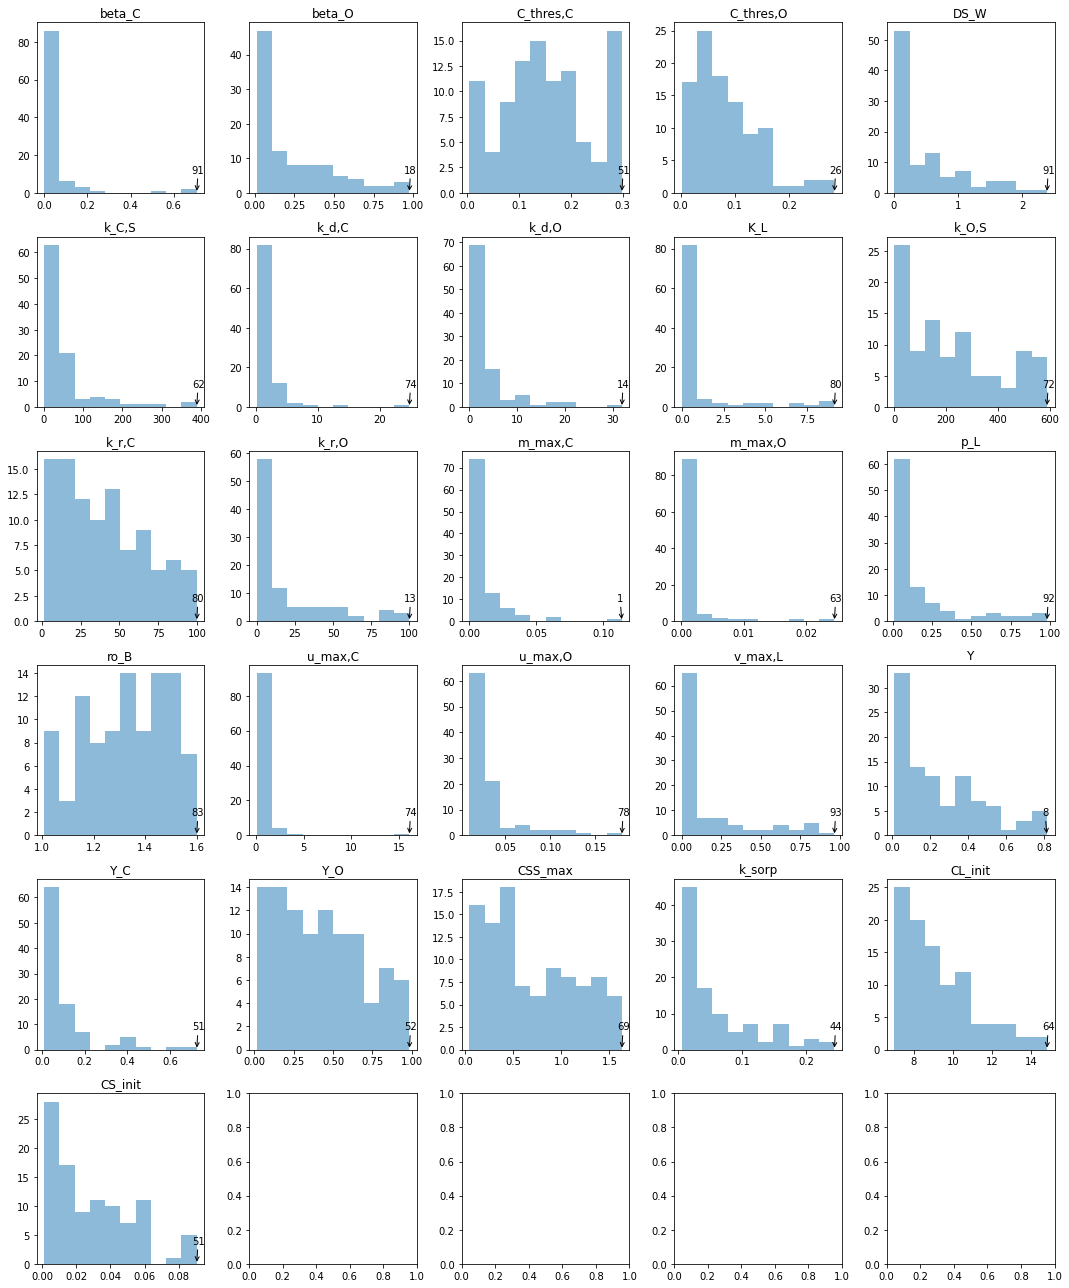

[1, 8, 13, 14, 18, 26, 44, 51, 52, 62, 63, 64, 69, 72, 74, 78, 80, 83, 91, 92, 93]


In [82]:
# Create subplots grid

# Calculate the number of rows and columns needed for subplots
num_rows = 6
num_cols = 5
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 18))

# Flatten the axes array to iterate over them easily
axes = axes.flatten()

outliers = []
# Plot histograms for each column
for i, column in enumerate(paramsets.columns):
    ax = axes[i]  # Get the current axis
    ax.hist(paramsets[column], alpha=0.5)
    ax.set_title(column)
    
    # Find row index with maximum value for the current column
    max_row_index = paramsets[column].idxmax()
    max_value = paramsets[column].max()
    outliers = outliers + [max_row_index]
    

    # Add label for maximum value
    ax.annotate(max_row_index,
                 xy=(max_value, 0), xycoords='data',
                 xytext=(-5, 20), textcoords='offset points',
                 arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))

# Remove any empty subplots if the number of columns exceeds the number of data columns
for i in range(len(df.columns), num_rows*num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

print(list(set(outliers)))

In [68]:
column = paramsets.columns[0]

In [71]:
column

'beta_C'

/tmp/ipykernel_379/1307962222.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  axes = paramsets.hist( alpha=0.5, label='x', ax=ax, log= True)#layout=(3,7),


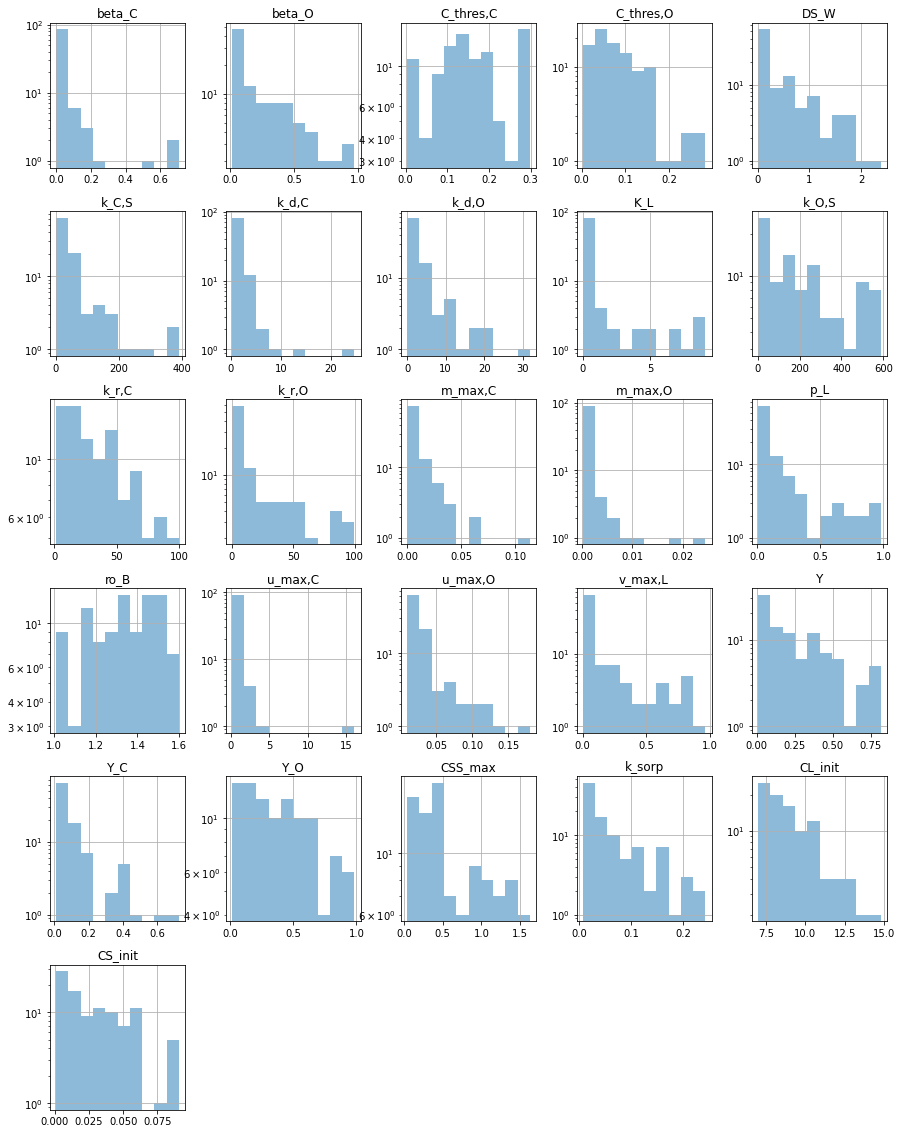

In [13]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
axes = paramsets.hist( alpha=0.5, label='x', ax=ax, log= True)#layout=(3,7),

plt.show()

In [17]:
import pingouin as pg
pwise = pg.pairwise_corr(np.log(paramsets), method='spearman')
highCorr = pwise[abs(pwise['r'])>=0.5]#.sort_values('r', ascending=False).head(n = 15)]
nameHighCorr = list(set(list(highCorr['X'])+list(highCorr['Y'])))

In [18]:
pwise

,X,Y,method,alternative,n,r,CI95%,p-unc,power
0,beta_C,beta_O,spearman,two-sided,99,0.203364,"[0.01, 0.39]",0.043498,0.527757
1,beta_C,"C_thres,C",spearman,two-sided,99,0.189796,"[-0.01, 0.37]",0.059890,0.472388
2,beta_C,"C_thres,O",spearman,two-sided,99,0.242573,"[0.05, 0.42]",0.015556,0.682910
3,beta_C,DS_W,spearman,two-sided,99,-0.147805,"[-0.34, 0.05]",0.144292,0.310575
4,beta_C,"k_C,S",spearman,two-sided,99,-0.043810,"[-0.24, 0.15]",0.666781,0.071408
...,...,...,...,...,...,...,...,...,...
320,CSS_max,CL_init,spearman,two-sided,99,-0.008534,"[-0.21, 0.19]",0.933185,0.050647
321,CSS_max,CS_init,spearman,two-sided,99,-0.024564,"[-0.22, 0.17]",0.809291,0.056559
322,k_sorp,CL_init,spearman,two-sided,99,0.067310,"[-0.13, 0.26]",0.507990,0.101563
323,k_sorp,CS_init,spearman,two-sided,99,0.289363,"[0.1, 0.46]",0.003673,0.834388


In [35]:
pp =paramsets.corr(method='spearman').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

In [36]:
pp

,beta_C,beta_O,"C_thres,C","C_thres,O",DS_W,"k_C,S","k_d,C","k_d,O",K_L,"k_O,S","k_r,C","k_r,O","m_max,C","m_max,O",p_L,ro_B,"u_max,C","u_max,O","v_max,L",Y,Y_C,Y_O,CSS_max,k_sorp,CL_init,CS_init
beta_C,1.0,0.2,0.19,0.24,-0.15,-0.044,-0.038,-0.085,0.16,0.059,0.17,-0.12,-0.26,0.021,-0.12,0.13,-0.087,0.093,0.15,-0.003,-0.0087,0.092,0.024,0.1,0.063,0.068
beta_O,0.2,1.0,0.079,0.087,0.22,-0.079,0.2,-0.035,-0.084,-0.11,0.29,0.076,-0.32,-0.22,0.18,0.0089,0.19,-0.11,0.08,-0.12,-0.26,-0.29,-0.053,-0.049,-0.0072,0.015
"C_thres,C",0.19,0.079,1.0,0.61,0.18,-0.29,-0.25,-0.066,0.17,-0.24,-0.049,0.033,-0.14,-0.053,-0.21,-0.14,-0.12,-0.099,-0.12,0.16,0.13,0.0067,-0.066,0.11,-0.059,0.31
"C_thres,O",0.24,0.087,0.61,1.0,0.056,-0.38,-0.045,-0.11,0.11,-0.18,-0.18,0.025,0.044,-0.057,-0.12,-0.12,0.017,-0.059,-0.03,0.16,0.059,-0.025,-0.14,0.29,0.054,0.57
DS_W,-0.15,0.22,0.18,0.056,1.0,-0.24,-0.028,0.19,0.26,-0.27,0.17,0.29,-0.14,-0.18,-0.11,-0.22,0.025,-0.017,-0.11,-0.091,-0.089,-0.15,0.0046,0.094,-0.027,0.2
"k_C,S",-0.044,-0.079,-0.29,-0.38,-0.24,1.0,0.23,-0.059,-0.21,0.6,-0.061,-0.038,0.23,0.23,0.11,0.036,-0.0046,0.086,0.2,-0.14,0.1,0.13,0.16,-0.27,0.047,-0.34
"k_d,C",-0.038,0.2,-0.25,-0.045,-0.028,0.23,1.0,-0.036,-0.059,0.2,0.28,0.0034,0.03,0.027,0.07,-0.037,0.58,-0.11,0.15,-0.11,0.03,0.023,-0.084,-0.14,-0.088,-0.022
"k_d,O",-0.085,-0.035,-0.066,-0.11,0.19,-0.059,-0.036,1.0,0.18,-0.16,0.086,0.85,-0.16,-0.32,0.13,-0.19,-0.032,0.29,0.027,-0.2,-0.21,-0.16,-0.11,-0.28,0.021,-0.11
K_L,0.16,-0.084,0.17,0.11,0.26,-0.21,-0.059,0.18,1.0,-0.27,-0.13,0.11,-0.026,-0.13,-0.27,-0.21,-0.04,-0.041,0.012,0.039,0.094,0.13,-0.13,0.048,0.0084,0.21
"k_O,S",0.059,-0.11,-0.24,-0.18,-0.27,0.6,0.2,-0.16,-0.27,1.0,-0.032,-0.18,0.2,0.28,0.034,0.14,0.058,0.06,0.11,-0.049,0.042,0.17,0.12,-0.0021,0.13,-0.075


In [32]:
type(pp)

pandas.io.formats.style.Styler

In [37]:
html = pp.to_html()
import imgkit
imgkit.from_string(html, 'results.png')

ModuleNotFoundError: No module named 'imgkit'

In [40]:
import numpy as np
import pandas as pd
import dataframe_image as dfi
dfi.export(pp, 'df_styled.png')

OSError: Chrome executable not able to be found on your machine

In [ ]:
import matplotlib
import seaborn as sns

def save_df_as_image(df, path):
    # Set background to white
    norm = matplotlib.colors.Normalize(-1,1)
    colors = [[norm(-1.0), "white"],
            [norm( 1.0), "white"]]
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
    # Make plot
    plot = sns.heatmap(df, annot=True, cmap=cmap, cbar=False)
    fig = plot.get_figure()
    fig.savefig(path)
save_df_as_image(df, "results.png")

[]

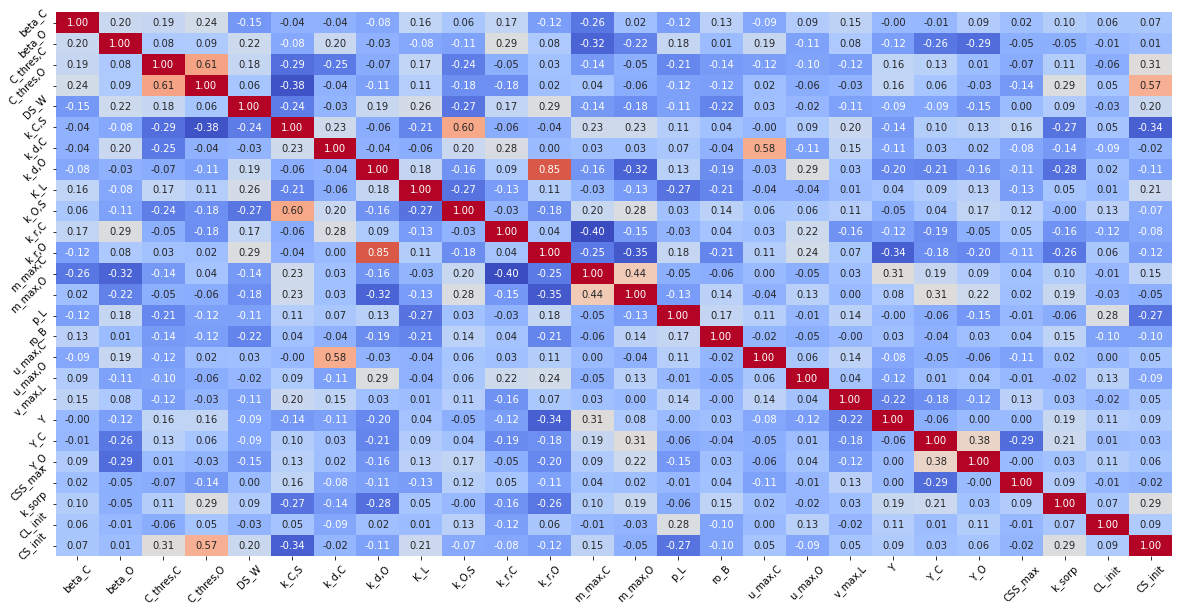

In [51]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(paramsets.corr(method='spearman'), annot=True, fmt='.2f', 
            cmap=plt.get_cmap('coolwarm'), cbar=False, ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), rotation=45)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.plot()#savefig('result.png', bbox_inches='tight', pad_inches=0.0)

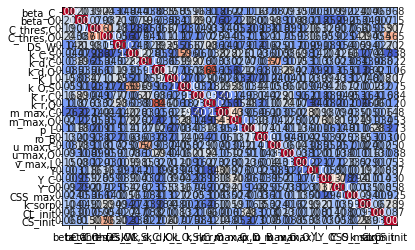

In [26]:
import colorsys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

corr = paramsets.corr(method='spearman').style.format("{:.2}")
heatmap = ax.pcolor(data, cmap=plt.get_cmap('coolwarm'), 
                    vmin=np.nanmin(data), vmax=np.nanmax(data))
ax.set_xticks(np.arange(data.shape[1])+0.5, minor=False)
ax.set_yticks(np.arange(data.shape[0])+0.5, minor=False)
ax.invert_yaxis()
row_labels = corr.index
column_labels = corr.columns
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(column_labels, minor=False)

def _annotate_heatmap(ax, mesh):
    """
    **Taken from seaborn/matrix.py**
    Add textual labels with the value in each cell.
    """
    mesh.update_scalarmappable()
    xpos, ypos = np.meshgrid(ax.get_xticks(), ax.get_yticks())
    for x, y, val, color in zip(xpos.flat, ypos.flat,
                                mesh.get_array(), mesh.get_facecolors()):
        if val is not np.ma.masked:
            _, l, _ = colorsys.rgb_to_hls(*color[:3])
            text_color = ".15" if l > .5 else "w"
            val = ("{:.3f}").format(val)
            text_kwargs = dict(color=text_color, ha="center", va="center")
            # text_kwargs.update(self.annot_kws)
            ax.text(x, y, val, **text_kwargs)

_annotate_heatmap(ax, heatmap)
plt.savefig('result.png', bbox_inches='tight', pad_inches=0.0)

In [6]:
highCorr

,X,Y,method,alternative,n,r,CI95%,p-unc,power
49,"C_thres,C","C_thres,O",spearman,two-sided,99,0.612331,"[0.47, 0.72]",1.641669e-11,1.000000
93,"C_thres,O",CS_init,spearman,two-sided,99,0.565034,"[0.41, 0.69]",1.111578e-09,0.999993
118,"k_C,S","k_O,S",spearman,two-sided,99,0.596277,"[0.45, 0.71]",7.415848e-11,0.999999
144,"k_d,C","u_max,C",spearman,two-sided,99,0.578776,"[0.43, 0.7]",3.499896e-10,0.999997
157,"k_d,O","k_r,O",spearman,two-sided,99,0.845937,"[0.78, 0.89]",3.113642e-28,1.000000


[]

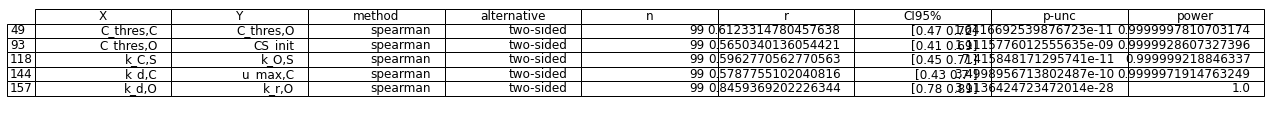

In [10]:

fig, ax = plt.subplots(figsize=(12, 2)) # set size frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
ax.set_frame_on(False)  # no visible frame, uncomment if size is ok
tabla = table(ax, highCorr, loc='upper right', colWidths=[0.17]*len(highCorr.columns))  # where df is your data frame
tabla.auto_set_font_size(False) # Activate set fontsize manually
tabla.set_fontsize(12) # if ++fontsize is necessary ++colWidths
tabla.scale(1.2, 1.2) # change size table
plt.plot()#'table.png', transparent=True)

In [15]:
toDrop = highCorr['Y']

In [17]:
repr(list(toDrop))

"['C_thres,O', 'CS_init', 'k_O,S', 'u_max,C', 'k_r,O']"

In [11]:
psethc =np.log( paramsets[nameHighCorr])

In [12]:
psethc.min()

k_r,O       -2.491129
C_thres,C   -5.572118
k_O,S        0.197401
k_C,S        0.010151
C_thres,O   -6.079009
k_d,C       -1.744056
k_d,O       -3.835305
CS_init     -6.815472
u_max,C     -2.224973
dtype: float64

In [13]:
psethc.max()

k_r,O        4.604014
C_thres,C   -1.209396
k_O,S        6.378642
k_C,S        5.963533
C_thres,O   -1.258660
k_d,C        3.209710
k_d,O        3.462047
CS_init     -2.400471
u_max,C      2.775404
dtype: float64

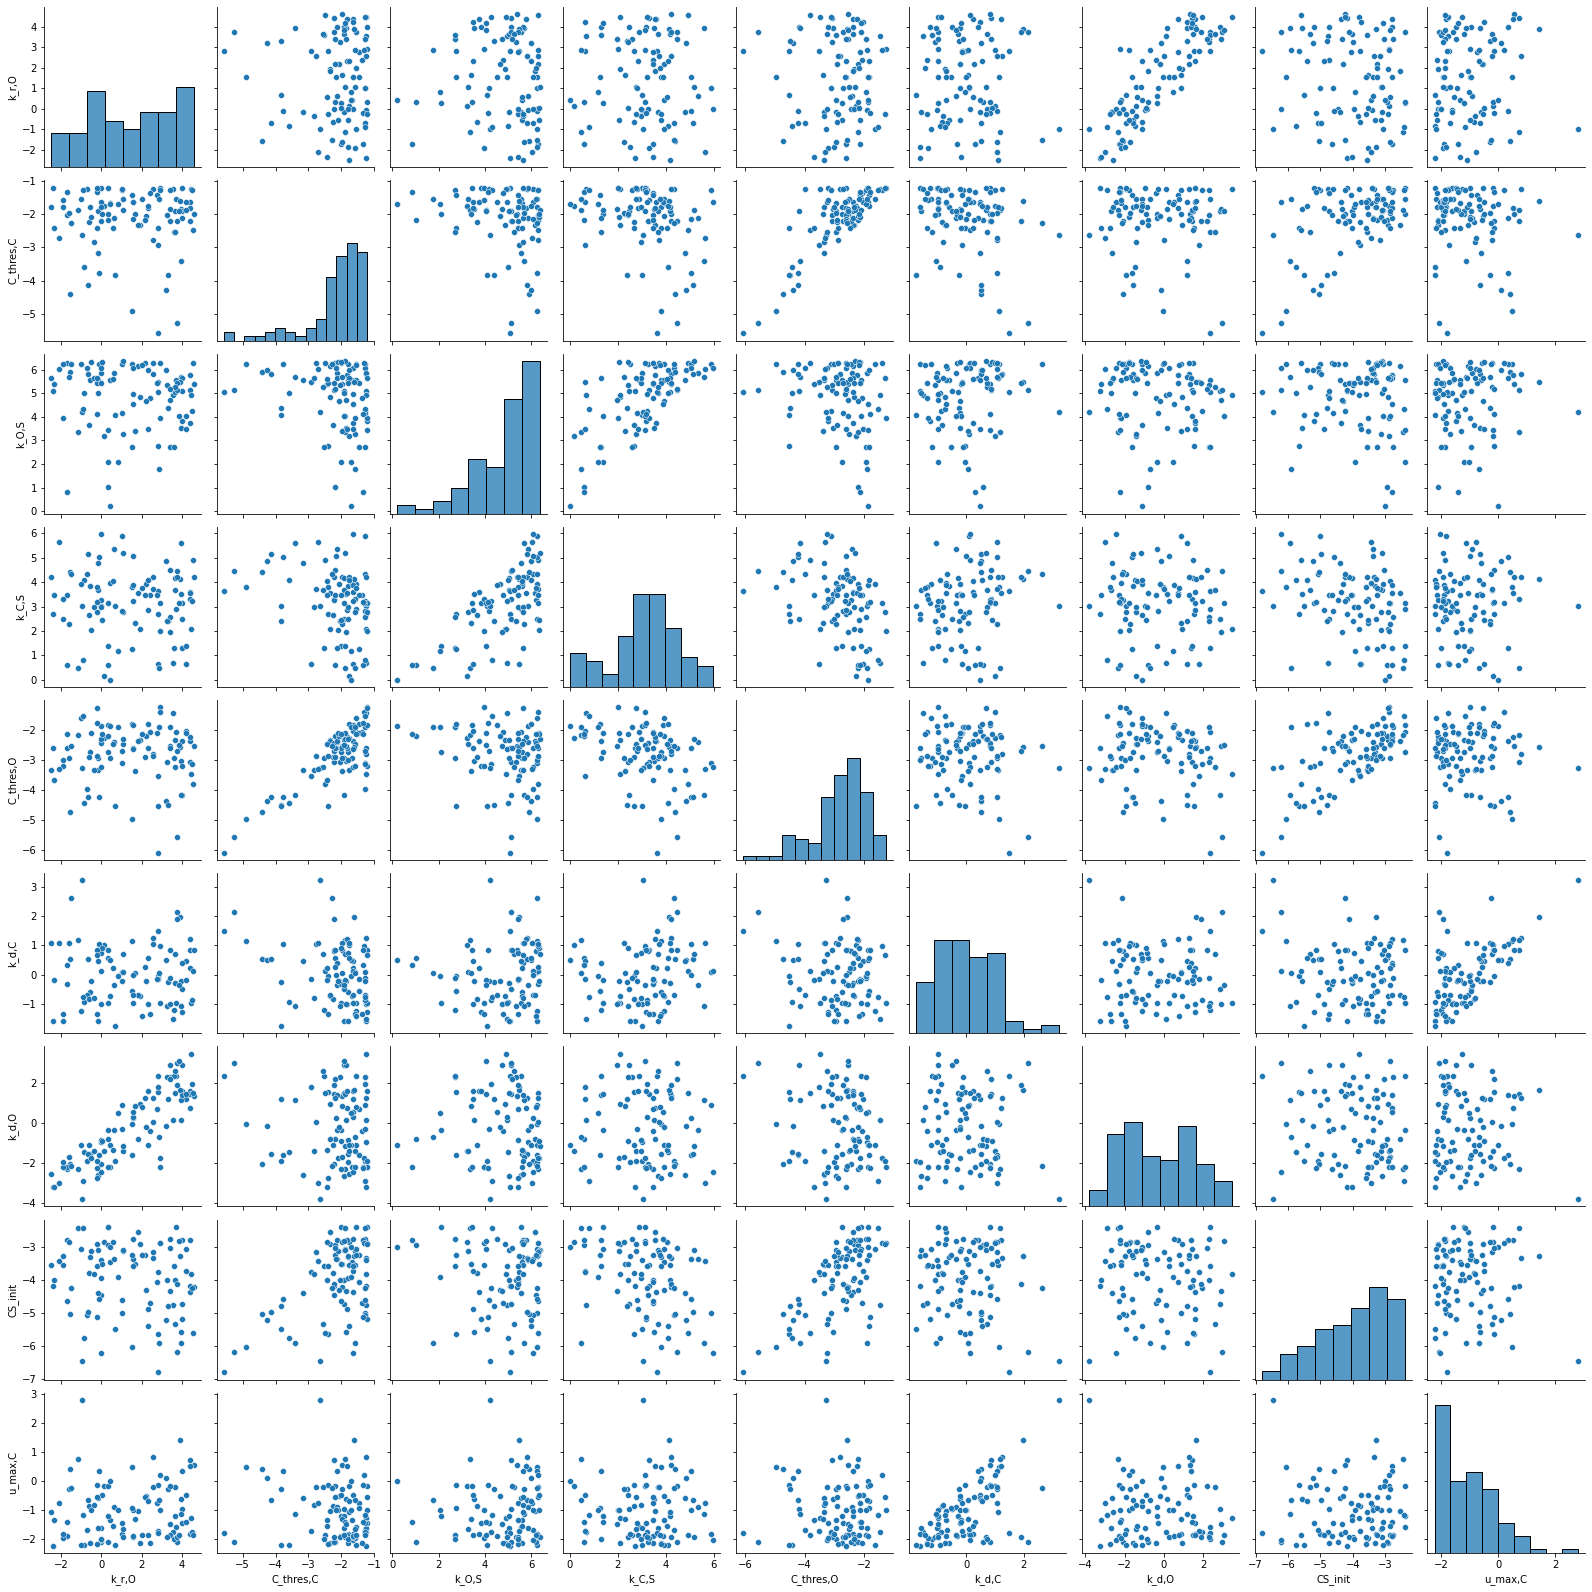

In [14]:
sns.pairplot(psethc)
plt.show()
#kro, kdo
#CthresC, CthresO, CS_init
#u_maxC, kdC

In [ ]:
highCorr

In [8]:
paramsets[nameHighCorr]

,DS_W,"C_thres,O","k_O,S",CS_init,"C_thres,C","m_max,O",beta_C,k_sorp,"m_max,C","k_d,O",...,"k_d,C",p_L,Y_O,"k_r,C","k_C,S",Y,"u_max,C",beta_O,CL_init,"u_max,O"
0,0.577160,0.044177,515.578895,0.006590,0.281219,0.000782,0.691167,0.039387,0.001320,2.393030,...,1.095294,0.091372,0.469288,34.031539,359.916532,0.234902,0.161895,0.842067,11.083551,0.062827
1,0.817303,0.064543,267.005433,0.036058,0.165317,0.019477,0.000262,0.116672,0.113772,0.205172,...,0.557839,0.194179,0.294169,14.920640,45.698887,0.487350,0.117888,0.019111,11.870338,0.018034
2,1.651453,0.093661,42.257036,0.012511,0.192125,0.000168,0.000545,0.007930,0.001649,5.015538,...,1.262547,0.115530,0.207924,44.408864,37.035661,0.118661,0.158611,0.137665,8.527424,0.037436
3,0.464336,0.052792,266.614377,0.031606,0.189989,0.001326,0.000257,0.011472,0.014423,0.110219,...,0.492477,0.026536,0.510557,25.072046,51.832266,0.050240,0.259170,0.036659,8.856918,0.012368
4,0.069015,0.123551,264.346991,0.090463,0.214415,0.000164,0.002807,0.042139,0.000747,10.368275,...,0.380583,0.011484,0.641183,28.636051,17.799625,0.010471,0.203234,0.013836,9.811557,0.084718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0.010269,0.116312,489.817148,0.038680,0.210233,0.001099,0.189394,0.098103,0.001950,2.211250,...,0.244397,0.044940,0.795052,71.691312,42.995557,0.139725,0.153058,0.021075,9.492146,0.022700
95,0.095294,0.146070,7.939796,0.019544,0.181280,0.000483,0.137496,0.076816,0.001724,1.618790,...,0.975345,0.978446,0.744664,61.185180,3.312026,0.523761,0.363055,0.485741,9.516327,0.024508
96,0.071074,0.074887,175.274590,0.047272,0.110730,0.000126,0.001870,0.006661,0.012171,8.874112,...,2.329951,0.087470,0.200649,66.220340,87.825283,0.033716,0.850909,0.039111,7.466796,0.130094
97,0.014471,0.077734,508.446438,0.014316,0.103562,0.000184,0.079662,0.010222,0.000297,0.115839,...,13.829579,0.281952,0.144132,92.815224,75.645247,0.374705,0.788434,0.415751,9.044359,0.026174


In [9]:
len(nameHighCorr)

23

In [22]:
from sklearn.preprocessing import StandardScaler
# Separating out the features
x = paramsets

# Separating out the target
y = np.array([i for i in range(paramsets.shape[0])])
target = pd.DataFrame(data = y
             , columns = ['pSet_id'])

# Standardizing the features
x = StandardScaler().fit_transform(x)

from sklearn.decomposition import PCA
numComp = 2

pca = PCA(n_components=numComp)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component '+str(i+1) for i in range(numComp)])

finalDf = pd.concat([principalDf, target[['pSet_id']]], axis = 1)

In [29]:
finalDf.columns.to_list()

['principal component 1', 'principal component 2', 'pSet_id']

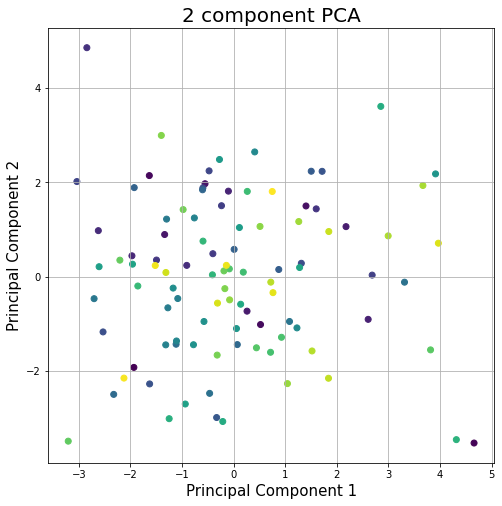

In [31]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

ax.scatter(finalDf[ 'principal component 1']
           , finalDf['principal component 2']
           , c = finalDf['pSet_id']
           )
#ax.legend(targets)
ax.grid()

In [32]:
pca.explained_variance_ratio_

array([0.11692947, 0.10835696])

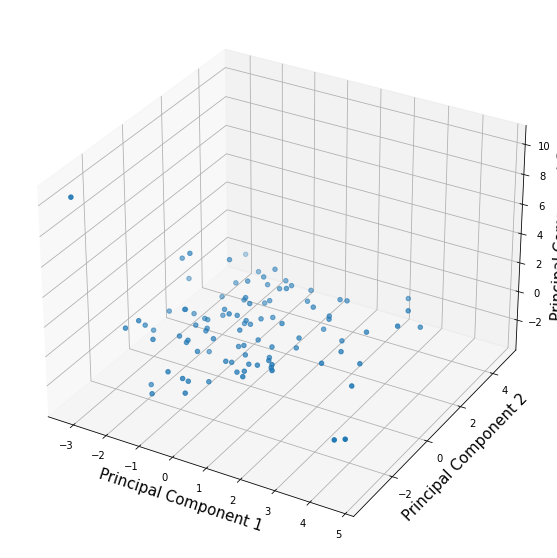

In [7]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns
# Separating out the features
x = paramsets

# Separating out the target
y = np.array([i for i in range(paramsets.shape[0])])
target = pd.DataFrame(data = y
             , columns = ['pSet_id'])

# Standardizing the features
x = StandardScaler().fit_transform(x)

from sklearn.decomposition import PCA
numComp = 3

pca = PCA(n_components=numComp)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component '+str(i+1) for i in range(numComp)])


finalDf = pd.concat([principalDf, target[['pSet_id']]], axis = 1)


# List of colors in the color palettes
rgb_values = sns.color_palette("Set2", 99)
color_labels = finalDf['pSet_id'].unique()


fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection='3d') 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
#ax.set_title('2 component PCA', fontsize = 20)

ax.scatter(finalDf[ 'principal component 1']
           , finalDf['principal component 2']
           , finalDf['principal component 3']
           #, c = finalDf['pSet_id']#.map(color_map)
           )

ax.grid()

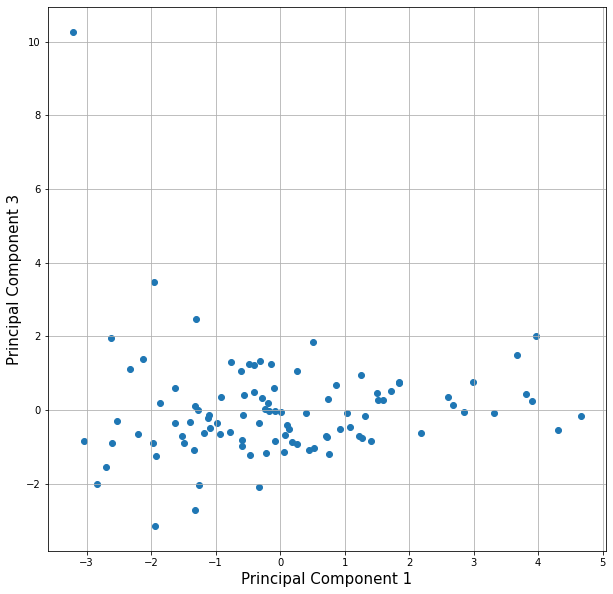

In [14]:

%matplotlib inline
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot()#projection='3d') 
        
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)

ax.scatter(finalDf[ 'principal component 1']
           , finalDf['principal component 3']
           )

ax.grid()# the one near 30 is no 74

In [8]:
pca.explained_variance_ratio_

array([0.11692947, 0.10835696, 0.08297092])

In [1]:
sum([0.11692947, 0.10835696, 0.08297092])

0.30825735

In [15]:
finalDf.loc[57]

principal component 1    -1.960662
principal component 2     0.262130
principal component 3     3.471891
pSet_id                  57.000000
Name: 57, dtype: float64

In [54]:
pd.set_option('display.max_rows', finalDf.shape[0]+1)
finalDf.sort_values('principal component 3')


,principal component 1,principal component 2,principal component 3,pSet_id
0,-1.933911,-1.927577,-3.150414,0
91,-1.313201,0.085987,-2.710331,91
78,-0.319577,-1.666577,-2.099126,78
62,-1.249946,-3.015290,-2.025597,62
14,-2.845321,4.854251,-1.996871,14
39,-2.704867,-0.469600,-1.541491,39
31,-1.927016,1.886070,-1.250207,31
36,-0.465698,-2.478124,-1.228940,36
94,0.762149,-0.341759,-1.181834,94
60,-0.211327,-3.075222,-1.163639,60


In [55]:

finalDf.sort_values('principal component 1')

,principal component 1,principal component 2,principal component 3,pSet_id
74,-3.205989,-3.492100,10.264053,74
20,-3.038337,2.014740,-0.843733,20
14,-2.845321,4.854251,-1.996871,14
39,-2.704867,-0.469600,-1.541491,39
12,-2.622841,0.973467,1.962403,12
55,-2.608018,0.208580,-0.891382,55
24,-2.531467,-1.174988,-0.288114,24
34,-2.324778,-2.499954,1.124995,34
75,-2.205287,0.347274,-0.654277,75
97,-2.126239,-2.154402,1.379281,97


In [57]:
finalDf

,principal component 1,principal component 2,principal component 3,pSet_id
0,-1.933911,-1.927577,-3.150414,0
1,4.659190,-3.531916,-0.151935,1
2,-1.634531,2.141388,-0.357939,2
3,0.520903,-1.018582,-1.040135,3
4,1.401900,1.496735,-0.850440,4
5,-0.554836,1.968725,0.415673,5
6,-1.337368,0.891158,-1.077136,6
7,0.259148,-0.734571,-0.908824,7
8,2.177597,1.058622,-0.631500,8
9,2.606889,-0.908441,0.366163,9


In [4]:
outlierdataset = np.array([2, 5, 9, 11, 12, 13, 14, 15, 17, 20, 21, 25, 28, 29, 32, 36, 40,
       42, 44, 54, 57, 61, 64, 67, 71, 74, 77, 81, 84, 89, 90, 98],
      dtype=object)

In [8]:
paramsets['pSet'] = [ii for ii in range(99)]

In [9]:
paramsets['noOut'] = [idsets not in  outlierdataset for idsets in paramsets['pSet']]

In [11]:
paramsetsNoOut = paramsets[paramsets['noOut']]

/tmp/ipykernel_85/2494325979.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  axes = paramsetsNoOut.hist( alpha=0.5, label='x', ax=ax)#layout=(3,7),


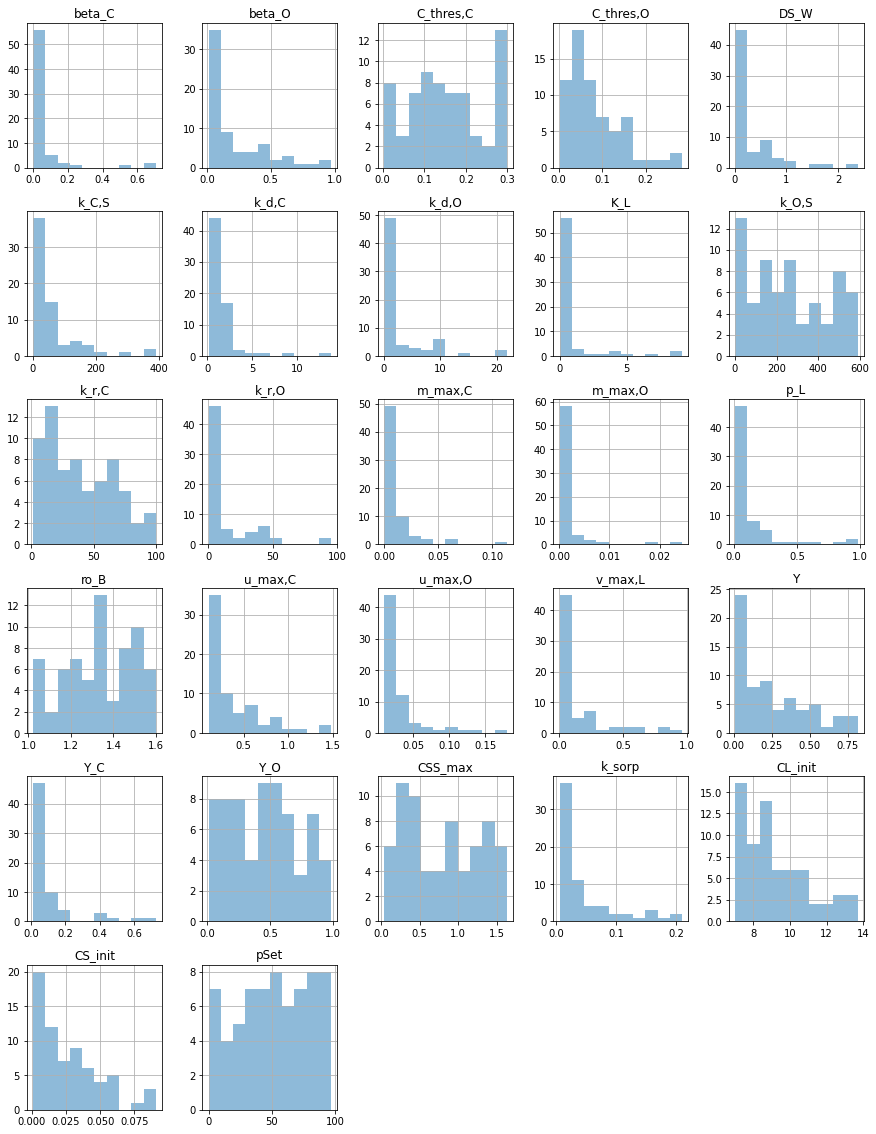

In [12]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
axes = paramsetsNoOut.hist( alpha=0.5, label='x', ax=ax)#layout=(3,7),

plt.show()

In [6]:
paramsets.index

RangeIndex(start=0, stop=99, step=1)